# Financial fraud detection using machine learning

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import zipfile
import io

pd.options.display.max_columns = None

In [4]:
# Zip file path
zip_file_path = '../datasets/archive.zip'

# Название CSV файла внутри архива
csv_file_name = 'PS_20174392719_1491204439457_log.csv'

# Загрузка CSV-файла из ZIP-архива в DataFrame
with zipfile.ZipFile(zip_file_path) as z:
    with z.open(csv_file_name) as f:
        df = pd.read_csv(f)

df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [5]:
# Проверяем типы данных
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
# Переобразуем тип данных для таргета так как это категориальная переменная класса
df['isFraud'] = df['isFraud'].astype('object')

In [8]:
# Выводим сводную статистику для цифровых значений
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [9]:
# Выводим сводную статистику для категориальных значений
df.describe(include=['object'])

,type,nameOrig,nameDest,isFraud
count,6362620,6362620,6362620,6362620
unique,5,6353307,2722362,2
top,CASH_OUT,C1902386530,C1286084959,0
freq,2237500,3,113,6354407


In [10]:
# Проверка на пропущенные значения
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
print("Maximum number of missing values in any column: ", df.isnull().sum().max())

Maximum number of missing values in any column:  0


In [14]:
# Проверка на дисбаланс классов
df['isFraud'].value_counts(normalize=True)

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

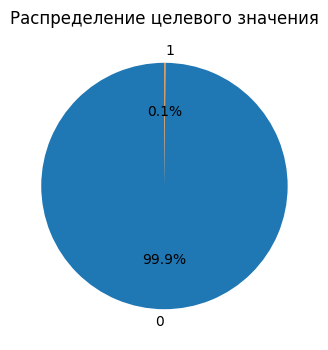

In [16]:
import matplotlib.pyplot as plt

# Подсчет частоты каждой категории
target_counts = df['isFraud'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(6, 4))
target_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Распределение целевого значения')
plt.ylabel('')  # Убираем ярлык оси Y
plt.show()


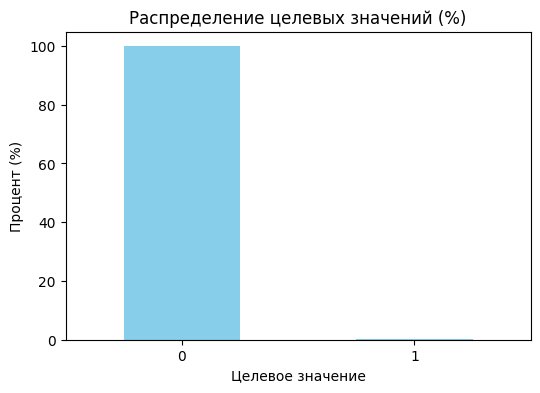

In [20]:
# Подсчет частоты каждой категории
target_counts = df['isFraud'].value_counts()

# Подсчет процентов
target_percentages = target_counts / target_counts.sum() * 100

# Построение вертикальной столбчатой диаграммы
plt.figure(figsize=(6, 4))
target_percentages.plot.bar(color='skyblue')
plt.title('Распределение целевых значений (%)')
plt.xlabel('Целевое значение')
plt.ylabel('Процент (%)')
plt.xticks(rotation=0)  # Убираем наклон оси X для лучшего отображения
plt.show()


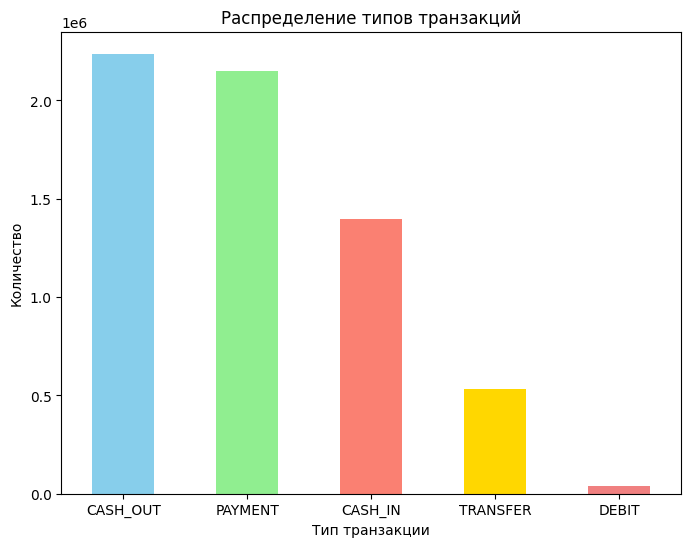

In [26]:
# Выводим наиболее частые типы транзакций
plt.figure(figsize=(8, 6))

transaction_type_counts = df['type'].value_counts()

# Определите уникальные типы и назначьте каждому типу свой цвет
unique_types = transaction_type_counts.index
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral']  # Добавьте больше цветов при необходимости

# Создание словаря для сопоставления типов и цветов
color_mapping = {unique_types[i]: colors[i % len(colors)] for i in range(len(unique_types))}

# Получение списка цветов для столбцов
transaction_colors = [color_mapping[t] for t in transaction_type_counts.index]

transaction_type_counts.plot.bar(color=transaction_colors)

plt.title('Распределение типов транзакций')
plt.xlabel('Тип транзакции')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

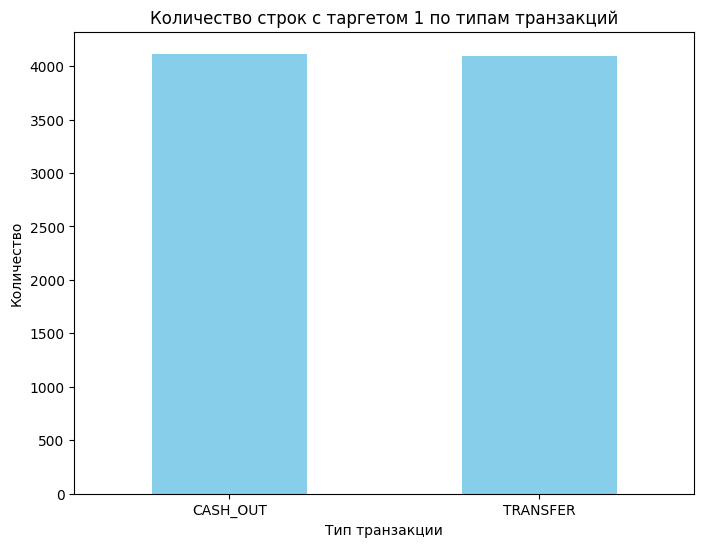

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


In [28]:
# Фильтрация DataFrame по таргету 1
filtered_df = df[df['isFraud'] == 1]

# Подсчет количества строк для каждого типа транзакции у таргета 1
transaction_counts = filtered_df['type'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))
transaction_counts.plot.bar(color='skyblue')
plt.title('Количество строк с таргетом 1 по типам транзакций')
plt.xlabel('Тип транзакции')
plt.ylabel('Количество')
plt.xticks(rotation=0)  # Убираем наклон оси X для лучшего отображения
plt.show()

# Вывод количества строк
print(transaction_counts)


In [29]:
# Поскольку у нас в датасете мошеннические действия могут быть только в транзакциях типа 'TRANSFER' и 'CASH_OUT',
# мы можем оставить только эти два типа транзакций для дальнейшего анализа
# Удаляем транзакции типа 'DEBIT', 'PAYMENT', 'CASH_IN'

data = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
print('Новые данные теперь содержат ', data.shape[0], ' транзакции.')

Новые данные теперь содержат  2770409  транзакции.


In [30]:
# Проверяем нет ли транзакции с отрицательными суммами

print('Количество транзакций с отрицательными суммами: ', data[data['amount'] < 0].shape[0])

Количество транзакций с отрицательными суммами:  0


In [31]:
# Проверяем нет ли транзакции с нулевыми суммами

print('Количество транзакций с нулевыми суммами: ', data[data['amount'] == 0].shape[0])

Количество транзакций с нулевыми суммами:  16


In [32]:
# Изучая данные этих транзакции мы видим, что эти транзакции мошеннические. Поэтому мы удаляем их из датасета
# и включаем это в условие при составление окончальных прогнозов

data = data[data['amount'] > 0]

In [34]:
# Процент транзакции, в которых первоначальный баланс отправителя равен 0
percentage_zero_balance_orig = data[data['oldbalanceOrg'] == 0].shape[0] / data.shape[0] * 100
print('Процент транзакции, в которых первоначальный баланс отправителя равен 0: ', percentage_zero_balance_orig)

Процент транзакции, в которых первоначальный баланс отправителя равен 0:  47.23394839649104


In [39]:
# Процент транзакции, в которых окончательный баланс пункта назначений равен 0
percentage_zero_balance_dest = data[data['newbalanceDest'] == 0].shape[0] / data.shape[0] * 100
print('Процент транзакции, в которых окончательный баланс пункта назначений равен 0: ', percentage_zero_balance_dest)

Процент транзакции, в которых окончательный баланс пункта назначений равен 0:  0.5989402947524052


In [40]:
# Then, we check these conditions to see whether the old balance and new balance
# variables are captured accurately for both originator and recipient.

# Проверяем, что для всех транзакций, в которых отправитель и получатель один и тот же аккаунт, баланс отправителя

# равен балансу получателя после транзакции
print('Количество транзакций, где отправитель и получатель один и тот же аккаунт: ',
      data[data['nameOrig'] == data['nameDest']].shape[0])

Количество транзакций, где отправитель и получатель один и тот же аккаунт:  0
